# 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라
### 조건1 : 각 후보별 순위 변동 없음,
### 조건 2 : 각 후보별 오차 1프로 이내,
### 조건 3 : 오차의 합이 최소인 지역 순서대로 정렬
### 실제 득표율 : 이재명 47.83, 윤석열 48.56, 심상정 2.37

In [7]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)
library(dplyr)
library(plotrix)
options(warn = -1)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
vote.전체투표율 <- c(47.83, 48.56,2.37 )


In [3]:
vote.투표율 <- election[,5:7]/ election[,4] * 100
vote.투표율  <- cbind(시군구=election$시군구, vote.투표율 )

In [4]:
vote.투표율  <- vote.투표율 [((abs(vote.투표율 [,2]- vote.전체투표율[1]) < 1) 
                & (abs(vote.투표율 [,3]-vote.전체투표율[2]) < 1) 
                & (abs(vote.투표율 [,4]-vote.전체투표율[3]) < 1) 
                & (vote.투표율 [,2] < vote.투표율 [,3])),]


In [5]:
vote.투표율$투표율오차 <- (abs(vote.투표율[,2] - vote.전체투표율[1]) + abs(vote.투표율 [,3] - vote.전체투표율[2]) + abs(vote.투표율 [,4] - vote.전체투표율[3]))
vote.투표율  <- arrange(vote.투표율 ,투표율오차)


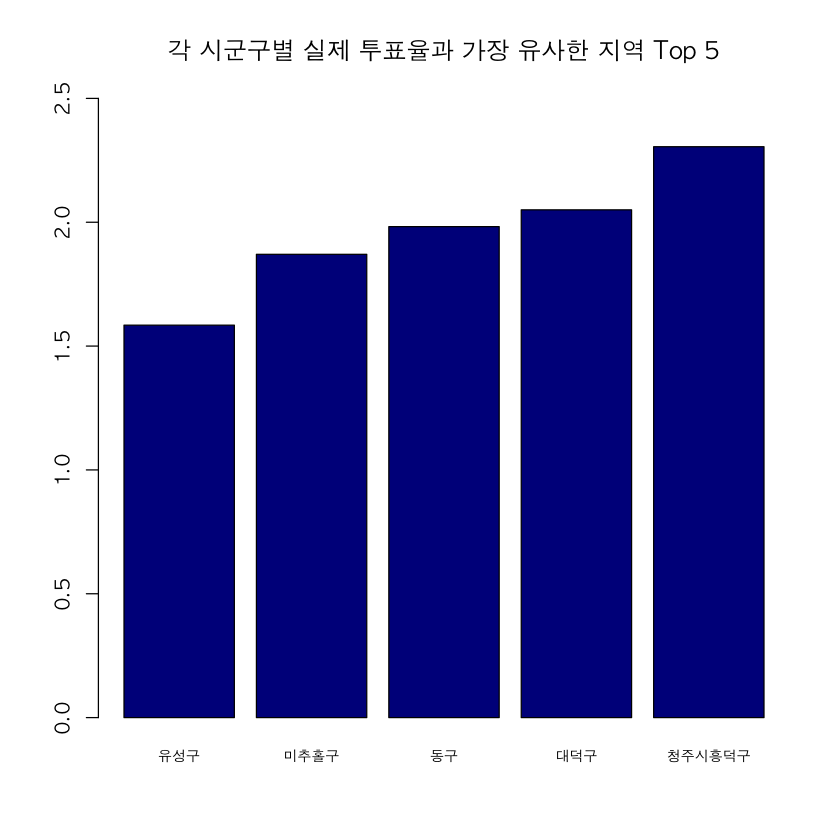

In [6]:
par(family = "AppleGothic")
options(warn = -1)
barplot(vote.투표율$투표율오차,
        main = "각 시군구별 실제 투표율과 가장 유사한 지역 Top 5",
        ylim = c(0,2.5),
        col = "darkblue",
        names = vote.투표율$시군구,
        cex.names = 0.7
       )